In [1]:
import plaidml.keras

plaidml.keras.install_backend()
import plaidml.keras.backend

In [2]:
import datetime
import tensorflow as tf
from keras import datasets, callbacks
from keras import utils
from keras import layers, optimizers, Sequential
from keras.layers import Conv2D,Activation,MaxPooling2D,Dropout,Flatten,Dense
import numpy as np
import matplotlib.pyplot as plt
import math
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import random
from tqdm import tqdm

In [4]:
def centerCrop(image):
    dimension = image.shape
    #X < Y
    if (dimension[0] < dimension[1]):
        start = int((dimension[1] - dimension[0])/2)
        return image[0 : dimension[0], start: start + dimension[0]]
    start = int((dimension[0] - dimension[1])/2)
    return image[start : start + dimension[1], 0 : dimension[1]]

In [5]:
donutPaths = ["D:\\MyStuffs\\PythonScripts\\MLAIProject\\donuts\\data",
              "D:\\MyStuffs\\PythonScripts\\MLAIProject\\donuts\\images\\data\\train\\donuts"]

amountOfImagesPer = 3442
imageSize = 128
converter = cv2.COLOR_BGR2RGB

datasets = []

donuts = []
for folder in donutPaths:
    for item in tqdm(os.listdir(folder)):
        path = os.path.join(folder, item)
        img = cv2.imread(path)        
        img = cv2.cvtColor(img, converter)
        img = centerCrop(img)
        img = cv2.resize(img, (imageSize, imageSize))
        donuts.append( (img, 0) )

random.shuffle(donuts)
print(len(donuts))
donuts = donuts[0:amountOfImagesPer]

capcicum = []
capcicumsPath = ["D:\\MyStuffs\\PythonScripts\\MLAIProject\\Capsicum\\CapsicumSet",
                 "D:\\MyStuffs\\PythonScripts\\MLAIProject\\Capsicum\\imges",
                "D:\\MyStuffs\\PythonScripts\\MLAIProject\\Capsicum\\Spliced_Capsicum",
                "D:\MyStuffs\PythonScripts\MLAIProject\Capsicum\dataCapsicum",
                "D:\MyStuffs\PythonScripts\MLAIProject\Capsicum\Spliced_Capsicum2"]
for folder in capcicumsPath:
    for item in tqdm(os.listdir(folder)):  
        path = os.path.join(folder, item)
        img = cv2.imread(path)        
        img = cv2.cvtColor(img, converter)
        img = centerCrop(img)
        img = cv2.resize(img, (imageSize, imageSize))
        capcicum.append((img, 1))

random.shuffle(capcicum)
print(len(capcicum))
capcicum = capcicum[0:amountOfImagesPer]

other = []
otherPath = ["D:\\MyStuffs\\PythonScripts\\MLAIProject\\other\\dataOther",
             "D:\\MyStuffs\\PythonScripts\\MLAIProject\\other\\other_data1",
            "D:\\MyStuffs\\PythonScripts\\MLAIProject\\other\\unsplash-images-collection"]
for folder in otherPath:
    for item in tqdm(os.listdir(folder)):
        path = os.path.join(folder, item)
        img = cv2.imread(path)        
        img = cv2.cvtColor(img, converter)
        img = centerCrop(img)
        img = cv2.resize(img, (imageSize, imageSize))
        other.append((img, 2))
        
random.shuffle(other)
print(len(other))
other = other[0:amountOfImagesPer]


datasets += donuts
datasets += capcicum
datasets += other
random.shuffle(datasets)

100%|████████████████████████████████████████████████████████████████████████████████| 877/877 [00:14<00:00, 60.75it/s]


3442


100%|██████████████████████████████████████████████████████████████████████████████| 2228/2228 [00:50<00:00, 44.00it/s]


5849


100%|███████████████████████████████████████████████████████████████████████████████| 802/802 [00:03<00:00, 243.40it/s]

3538


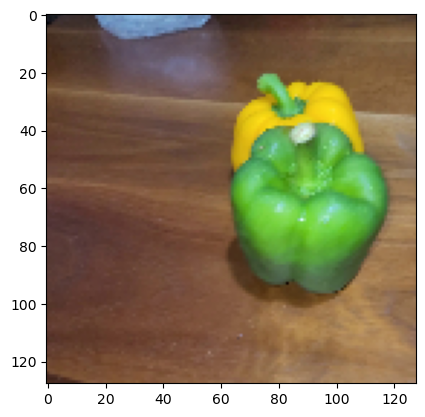

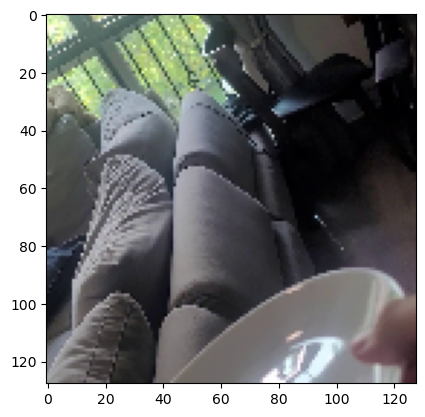

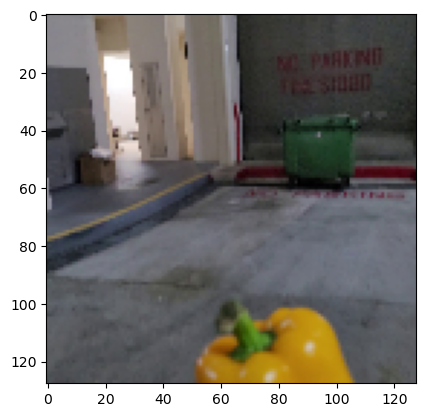

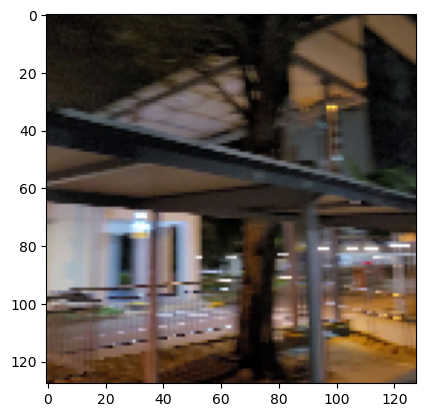

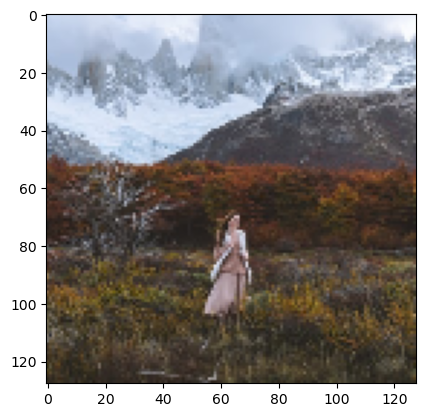

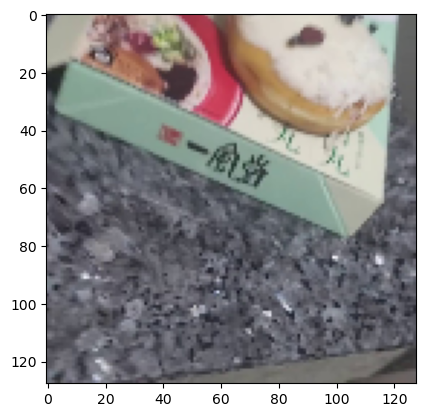

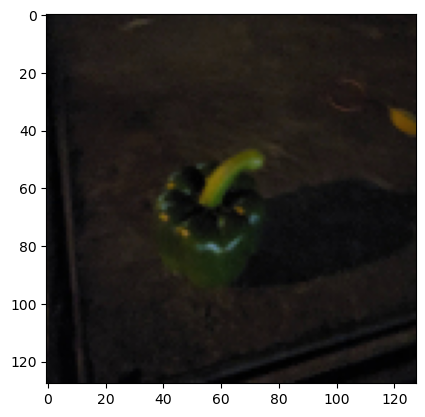

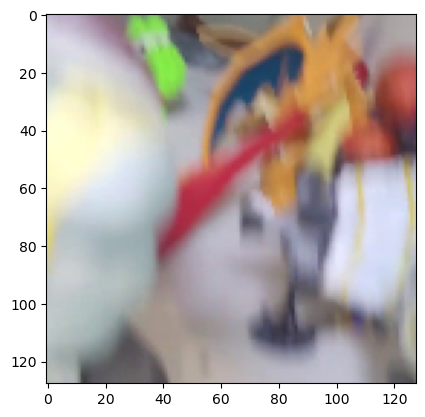

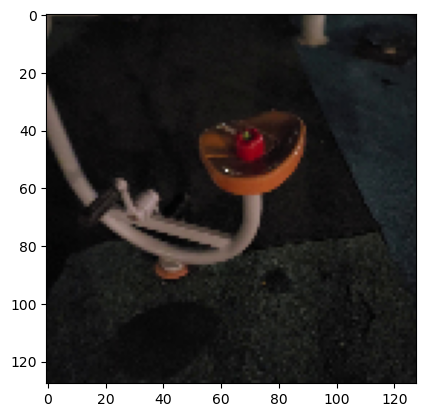

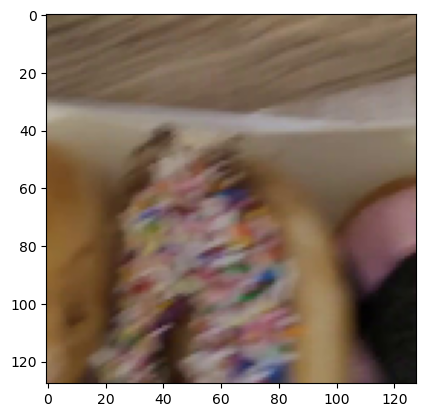

complete


In [6]:
X = []
Y = []
for data, label in datasets:
    X.append(data)
    Y.append(label)
X = np.array(X).reshape(-1, imageSize, imageSize, 3)
Y = np.array(Y)

for i in range(10):
    index = random.randint(0, len(datasets))
    plt.imshow(X[index])
    plt.show()
X = X/255.0
Y = utils.to_categorical(Y, 3)
np.save("X", X)
np.save("Y", Y)
print("complete")